<a href="https://www.kaggle.com/ayesha111/project-2-diabetes-prediction?scriptVersionId=87397984" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data collection and analysis

In [2]:
#loading the dataset
diabetes_dataset = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
#printing the first five rows of he dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
# getting the statstical measure of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# EDA

In [8]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

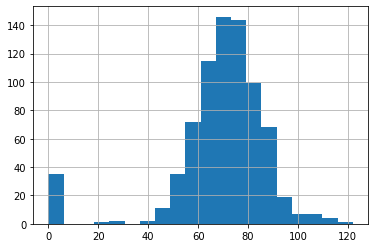

In [9]:
diabetes_dataset.BloodPressure.hist(bins =20)

<AxesSubplot:>

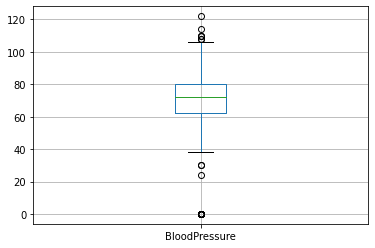

In [10]:
diabetes_dataset.boxplot(column = 'BloodPressure')

**Removing Outlier with capping technique**

In [11]:
upper_limit = np.percentile(diabetes_dataset['BloodPressure'],95)
print(upper_limit)

diabetes_dataset['Outlier_flag'] = np.where(diabetes_dataset['BloodPressure'] > upper_limit,'Outlier', 'Not_Outlier')
diabetes_dataset['Outlier_flag'].value_counts()

90.0


Not_Outlier    730
Outlier         38
Name: Outlier_flag, dtype: int64

In [12]:
diabetes_dataset['BloodPressure'] = np.where(diabetes_dataset['BloodPressure'] > upper_limit,upper_limit, diabetes_dataset['BloodPressure'])

<AxesSubplot:>

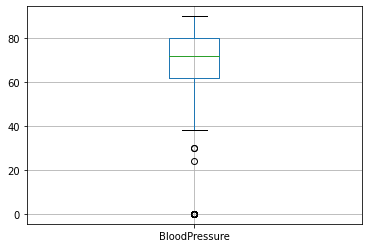

In [13]:
diabetes_dataset.boxplot(column = 'BloodPressure')

In [14]:
diabetes_dataset.drop('Outlier_flag', axis = 1, inplace = True)

In [15]:
lower_limit = np.percentile(diabetes_dataset['BloodPressure'],5)
print(lower_limit)

diabetes_dataset['Outlier_flag'] = np.where(diabetes_dataset['BloodPressure'] < lower_limit,'Outlier', 'Not_Outlier')
diabetes_dataset['Outlier_flag'].value_counts()

38.7


Not_Outlier    729
Outlier         39
Name: Outlier_flag, dtype: int64

In [16]:
diabetes_dataset['BloodPressure'] = np.where(diabetes_dataset['BloodPressure'] < lower_limit,lower_limit, diabetes_dataset['BloodPressure'])

<AxesSubplot:>

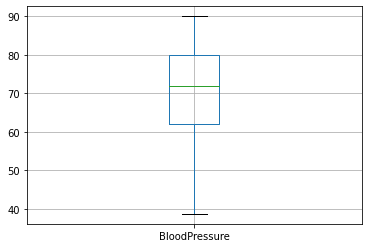

In [17]:
diabetes_dataset.boxplot(column = 'BloodPressure')

In [18]:
diabetes_dataset.drop('Outlier_flag', axis = 1, inplace = True)

# Separating the data and labels


In [19]:
#Separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome')
y = diabetes_dataset['Outcome']

In [20]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35        0  33.6   
1              1       85           66.0             29        0  26.6   
2              8      183           64.0              0        0  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48      180  32.9   
764            2      122           70.0             27        0  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0              0        0  30.1   
767            1       93           70.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [21]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standardization

In [22]:
scaler = StandardScaler()

In [23]:
X = scaler.fit_transform(X)

In [24]:
print(X)

[[ 0.63994726  0.84832379  0.12083932 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.3436869  ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.49852897 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.12083932 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.80821311 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192  -0.03400275 ... -0.20212881 -0.47378505
  -0.87137393]]


# Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)

# Training the model

In [26]:
classifier = svm.SVC(kernel = 'linear')

In [27]:
#training the support vector machine classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

# Model Evaluation

# Accuracy score

In [28]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [29]:
print("Accuracy score of the training data : ",training_data_accuracy )

Accuracy score of the training data :  0.7899022801302932


In [30]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [31]:
print("Accuracy score of the test data : ",test_data_accuracy )

Accuracy score of the test data :  0.7142857142857143


# Making a Predictive System

In [32]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.12083932 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic
